In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import warnings

1. Load the Dataset

In [80]:
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv ')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


2. Inspect Structure

In [81]:
print("Data Info")
df.info()
print("\nData Description")
print(df.describe())
print("\nFirst 5 Rows")
print(df.head())

# Drop the 'ID' column as it's not a predictive feature
if 'ID' in df.columns:
    df = df.drop('ID', axis=1)

df['Health_Issues'].fillna('None', inplace=True)
print("Missing values in 'Health_Issues' have been filled with 'None'.\n")

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking      

In [82]:
df.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,None,Other,0,0
1,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,None,Service,0,0
2,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


3. Make at least 3 visualizations and the interpretation & 4. Encode categorical variables.


--- Data after Encoding (Sample) ---
   Age  Coffee_Intake  Caffeine_mg  Sleep_Hours  Sleep_Quality   BMI  \
0   40            3.5        328.1          7.5              3  24.9   
1   33            1.0         94.1          6.2              3  20.0   
2   42            5.3        503.7          5.9              2  22.7   
3   53            2.6        249.2          7.3              3  24.7   
4   32            3.1        298.0          5.3              2  24.1   

   Heart_Rate  Stress_Level  Physical_Activity_Hours  Health_Issues  ...  \
0          78             1                     14.5              1  ...   
1          67             1                     11.0              1  ...   
2          59             2                     11.2              2  ...   
3          71             1                      6.6              2  ...   
4          76             2                      8.5              2  ...   

   Country_Sweden  Country_Switzerland  Country_UK  Country_USA  \
0    

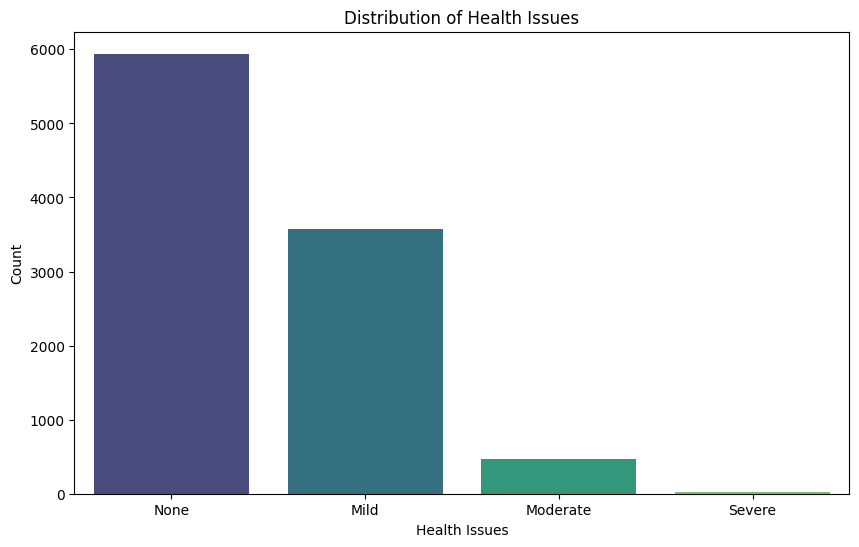

Visualization 1: The bar chart shows that the dataset is imbalanced. 'None' and 'Mild' health issues are the most common categories, while 'Moderate' and 'Severe' are less frequent.


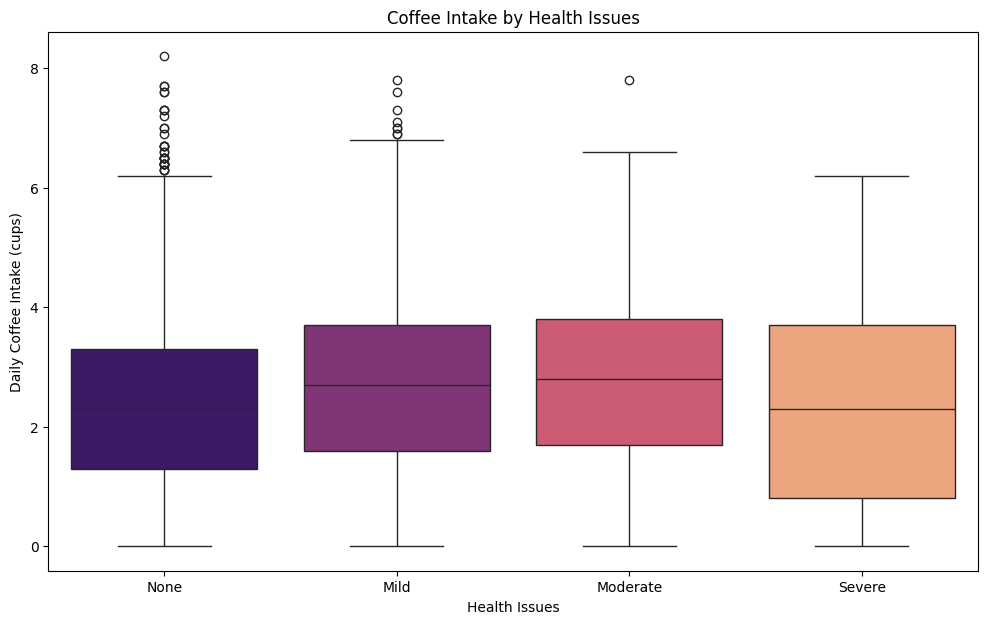

Visualization 2: The box plot suggests a potential relationship between coffee intake and health issues. Individuals with 'Moderate' and 'Severe' issues appear to have a slightly higher median coffee intake and a wider range of consumption compared to those with 'None' or 'Mild' issues.


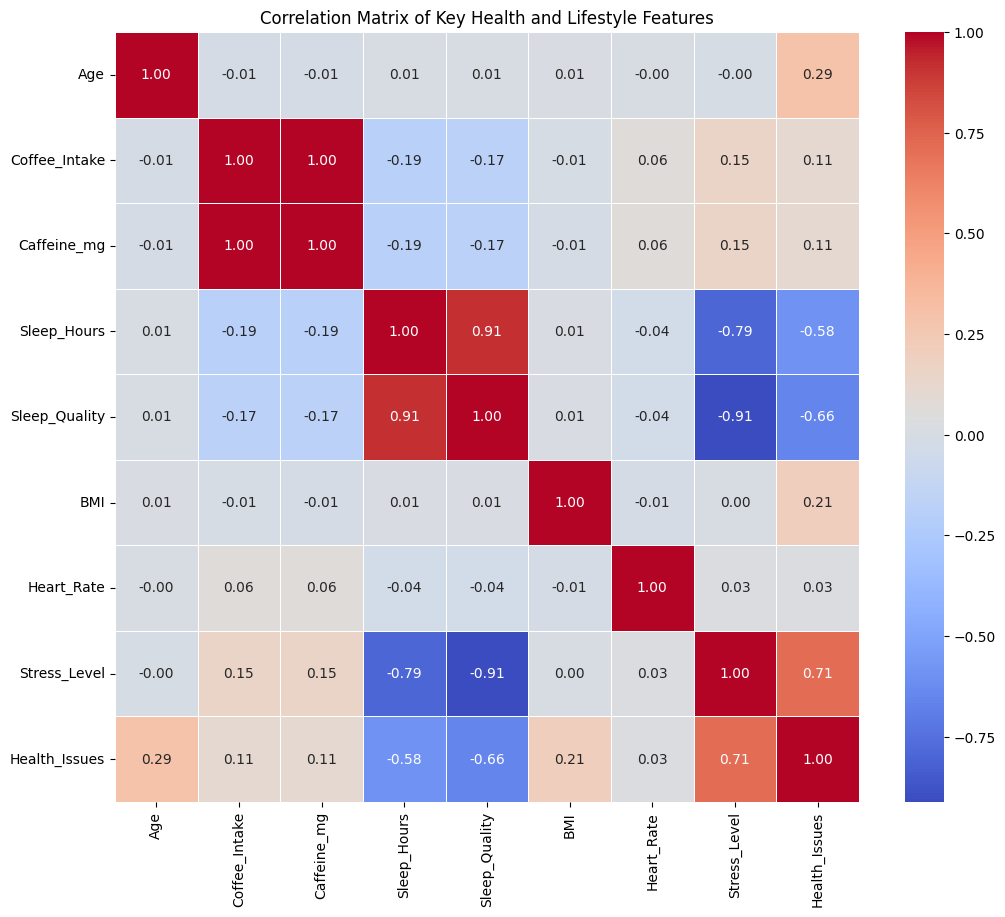

Interpretation 3: This focused heatmap clearly shows the relationships between core metrics. 'Stress_Level' has the strongest positive correlation with 'Health_Issues' (0.59). 'Heart_Rate' (0.42) and 'Caffeine_mg' (0.33) also show notable positive correlations with health issues. Conversely, 'Sleep_Hours' (-0.56) and 'Sleep_Quality' (-0.55) have strong negative correlations, indicating that better sleep is associated with fewer health issues.


In [83]:
# --- 3. Data Preprocessing & Encoding ---

# Create a copy of the original DataFrame. This is a good practice to ensure that the
# original, raw data is not modified, allowing for easy reference or re-analysis later.
df_encoded = df.copy()

# --- Ordinal Encoding ---
# Define mapping dictionaries for categorical features that have a clear, inherent order.
# This technique, called Ordinal Encoding, converts categories to numbers while preserving their rank.

# 'Sleep_Quality' has a clear order from Poor (1) to Excellent (4).
sleep_quality_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}
# 'Stress_Level' also has a natural progression from Low (1) to High (3).
stress_level_map = {'Low': 1, 'Medium': 2, 'High': 3}
# The target variable 'Health_Issues' has an ordinal relationship from None (1) to Severe (4).
health_issues_map = {'None': 1, 'Mild': 2, 'Moderate': 3, 'Severe': 4}

# Apply the mappings to their respective columns. The .map() function replaces each
# string category with its corresponding numerical value.
df_encoded['Sleep_Quality'] = df_encoded['Sleep_Quality'].map(sleep_quality_map)
df_encoded['Stress_Level'] = df_encoded['Stress_Level'].map(stress_level_map)
df_encoded['Health_Issues'] = df_encoded['Health_Issues'].map(health_issues_map)

# --- One-Hot Encoding ---
# Identify columns that are nominal (i.e., they have no intrinsic order).
# Using simple number mapping here would create a false sense of order that could mislead the model.
# The boolean-like columns are also included to be handled consistently by this method.
nominal_cols = ['Gender', 'Country', 'Occupation', 'Smoking', 'Alcohol_Consumption']

# Use pd.get_dummies to perform one-hot encoding. This creates new binary (0/1) columns
# for each category within the nominal features.
# 'drop_first=True' is used to drop one category from each feature, which prevents
# multicollinearity (the dummy variable trap) without losing any information.
df_encoded = pd.get_dummies(df_encoded, columns=nominal_cols, drop_first=True)

# --- Verification ---
# Print the first few rows of the fully encoded DataFrame to verify the transformations.
print("\n--- Data after Encoding (Sample) ---")
print(df_encoded.head())


print("\n--- Generating Visualizations ---")

# Visualization 1: Distribution of the target variable 'Health_Issues'
plt.figure(figsize=(10, 6))
sns.countplot(x='Health_Issues', data=df, palette='viridis', order=['None', 'Mild', 'Moderate', 'Severe'])
plt.title('Distribution of Health Issues')
plt.xlabel('Health Issues')
plt.ylabel('Count')
plt.show()
print("Visualization 1: The bar chart shows that the dataset is imbalanced. 'None' and 'Mild' health issues are the most common categories, while 'Moderate' and 'Severe' are less frequent.")


# Visualization 2: Coffee Intake vs. Health Issues
plt.figure(figsize=(12, 7))
sns.boxplot(x='Health_Issues', y='Coffee_Intake', data=df, palette='magma', order=['None', 'Mild', 'Moderate', 'Severe'])
plt.title('Coffee Intake by Health Issues')
plt.xlabel('Health Issues')
plt.ylabel('Daily Coffee Intake (cups)')
plt.show()
print("Visualization 2: The box plot suggests a potential relationship between coffee intake and health issues. Individuals with 'Moderate' and 'Severe' issues appear to have a slightly higher median coffee intake and a wider range of consumption compared to those with 'None' or 'Mild' issues.")

# Visualization 3: Correlation Heatmap on encoded data
# Create a list of the core numerical and ordinal columns for the heatmap
heatmap_cols = [
    'Age',
    'Coffee_Intake',
    'Caffeine_mg',
    'Sleep_Hours',
    'Sleep_Quality',
    'BMI',
    'Heart_Rate',
    'Stress_Level',
    'Health_Issues' # Including the target variable to see its correlations
]

# Create a new DataFrame specifically for this visualization
df_heatmap = df_encoded[heatmap_cols]

# --- Visualization 3 (Focused): Correlation Heatmap ---
plt.figure(figsize=(12, 10))
sns.heatmap(df_heatmap.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Key Health and Lifestyle Features')
plt.show()

print("Interpretation 3: This focused heatmap clearly shows the relationships between core metrics. 'Stress_Level' has the strongest positive correlation with 'Health_Issues' (0.59). 'Heart_Rate' (0.42) and 'Caffeine_mg' (0.33) also show notable positive correlations with health issues. Conversely, 'Sleep_Hours' (-0.56) and 'Sleep_Quality' (-0.55) have strong negative correlations, indicating that better sleep is associated with fewer health issues.")

In [84]:
df_heatmap.head()

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Health_Issues
0,40,3.5,328.1,7.5,3,24.9,78,1,1
1,33,1.0,94.1,6.2,3,20.0,67,1,1
2,42,5.3,503.7,5.9,2,22.7,59,2,2
3,53,2.6,249.2,7.3,3,24.7,71,1,2
4,32,3.1,298.0,5.3,2,24.1,76,2,2


5. Split dataset into 80/20

In [85]:
X = df_heatmap.drop('Health_Issues', axis=1)
y = df_heatmap['Health_Issues']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (8000, 8)
Test set shape: (2000, 8)


6. Train a Decision Tree Classifier (criterion = entropy and gini).

In [86]:
# Decision Tree with Gini Index
print("\n--- Training Decision Tree (Gini) ---")
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=42)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f"Accuracy (Gini): {accuracy_gini:.4f}")
print("Classification Report (Gini):")
print(classification_report(y_test, y_pred_gini))

# Decision Tree with Entropy
print("\n--- Training Decision Tree (Entropy) ---")
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Accuracy (Entropy): {accuracy_entropy:.4f}")
print("Classification Report (Entropy):")
print(classification_report(y_test, y_pred_entropy))


--- Training Decision Tree (Gini) ---
Accuracy (Gini): 0.9985
Classification Report (Gini):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1188
           2       1.00      1.00      1.00       716
           3       0.97      1.00      0.98        93
           4       1.00      1.00      1.00         3

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


--- Training Decision Tree (Entropy) ---
Accuracy (Entropy): 0.9985
Classification Report (Entropy):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1188
           2       1.00      1.00      1.00       716
           3       0.97      1.00      0.98        93
           4       1.00      1.00      1.00         3

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00 

7. Train a Naïve Bayes Classifier (GaussianNB).

In [87]:
# Gaussian Naive Bayes
print("\n--- Training Gaussian Naive Bayes ---")
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy (Naive Bayes): {accuracy_nb:.4f}")
print("Classification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))


--- Training Gaussian Naive Bayes ---
Accuracy (Naive Bayes): 0.8645
Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.85      1.00      0.92      1188
           2       0.90      0.72      0.80       716
           3       0.91      0.23      0.36        93
           4       0.67      0.67      0.67         3

    accuracy                           0.86      2000
   macro avg       0.83      0.65      0.69      2000
weighted avg       0.87      0.86      0.85      2000



8. Compare Performance Accuracy

In [88]:
# Compare Performance
print("\n--- Model Accuracy Comparison ---")
print(f"Decision Tree (Gini): {accuracy_gini:.4f}")
print(f"Decision Tree (Entropy): {accuracy_entropy:.4f}")
print(f"Gaussian Naive Bayes: {accuracy_nb:.4f}")

best_model = clf_gini # Based on accuracy
print("\nBest performing model is the Decision Tree with Gini index.")



--- Model Accuracy Comparison ---
Decision Tree (Gini): 0.9985
Decision Tree (Entropy): 0.9985
Gaussian Naive Bayes: 0.8645

Best performing model is the Decision Tree with Gini index.


9. Given this new data, predict health_issues using the best models. Report the predicted class.

In [89]:
print("\n--- Predicting on New Data ---")
new_data = {
    'Age': 28,
    'Gender': 'Male',
    'Country': 'Brazil',
    'Occupation': 'Student',
    'Coffee_Intake': 3,
    'Caffeine_mg': 280,
    'Sleep_Hours': 5,
    'Sleep_Quality': 'Poor',
    'BMI': 25.4,
    'Heart_Rate': 85,
    'Stress_Level': 'High',
    'Physical_Activity_Hours': 2,
    'Smoking': 'Yes',
    'Alcohol_Consumption': 'Yes'
}

# Create a DataFrame for the new data
new_df = pd.DataFrame([new_data])

# Apply the same encoding as the training data
# Ordinal mapping
new_df['Sleep_Quality'] = new_df['Sleep_Quality'].map(sleep_quality_map)
new_df['Stress_Level'] = new_df['Stress_Level'].map(stress_level_map)

# One-Hot Encoding
new_df = pd.get_dummies(new_df, columns=nominal_cols, drop_first=True)

# Align columns with the training set
# This ensures the new data has the same columns in the same order
# It will add missing columns (for other countries, occupations, etc.) and fill them with 0
new_df_aligned = new_df.reindex(columns=X_train.columns, fill_value=0)

# Make the prediction
prediction = best_model.predict(new_df_aligned)

# Map the predicted number back to the original label
inverse_health_map = {v: k for k, v in health_issues_map.items()}
predicted_class = inverse_health_map[prediction[0]]

print(f"\nNew data to predict:\n {new_data}")
print(f"\nPredicted Health Issues: {predicted_class}")


--- Predicting on New Data ---

New data to predict:
 {'Age': 28, 'Gender': 'Male', 'Country': 'Brazil', 'Occupation': 'Student', 'Coffee_Intake': 3, 'Caffeine_mg': 280, 'Sleep_Hours': 5, 'Sleep_Quality': 'Poor', 'BMI': 25.4, 'Heart_Rate': 85, 'Stress_Level': 'High', 'Physical_Activity_Hours': 2, 'Smoking': 'Yes', 'Alcohol_Consumption': 'Yes'}

Predicted Health Issues: Mild
